In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/My_Data/Sale_price_prediction/dataset/TRAIN.csv")
test = pd.read_csv("/content/drive/MyDrive/My_Data/Sale_price_prediction/dataset/TEST.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
display(train.head().append(train.tail()),test.head().append(test.tail()))

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
712041,342,2,2013-10-01,10182,836,1,0,0,0
712042,343,2,2013-10-01,5352,588,1,0,0,0
712043,344,2,2013-10-01,6652,1043,1,0,0,1
712044,345,2,2013-10-01,3842,475,1,0,0,0
712045,346,2,2013-10-01,6143,599,1,0,0,0


,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,767,1,2013-04-01,0,0,b,1
1,1111,6,2013-03-16,1,0,0,0
2,45,4,2013-08-01,1,1,0,1
3,500,4,2013-05-23,1,0,0,1
4,82,2,2013-08-06,1,0,0,1
305158,412,2,2013-05-28,1,1,0,1
305159,936,6,2013-03-02,1,0,0,0
305160,21,1,2013-09-16,1,0,0,0
305161,1077,6,2013-06-22,1,0,0,0
305162,321,6,2013-09-07,1,0,0,0


In [ ]:
display(train.describe(),test.describe())

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,712046.000000,712046.000000,712046.000000,712046.000000,712046.000000,712046.000000,712046.000000
mean,558.427662,3.999787,5872.082608,637.975274,0.828574,0.380600,0.172167
std,321.965298,1.996273,3918.569033,468.446468,0.376881,0.485535,0.377526
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3795.000000,410.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5848.000000,614.000000,1.000000,0.000000,0.000000
75%,838.000000,6.000000,7991.000000,843.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,5494.000000,1.000000,1.000000,1.000000


,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,305163.000000,305163.000000,305163.000000,305163.000000,305163.000000
mean,558.434545,3.994967,0.833682,0.383647,0.193765
std,321.776964,1.999997,0.372366,0.486274,0.395248
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,1.000000,0.000000,0.000000
50%,559.000000,4.000000,1.000000,0.000000,0.000000
75%,837.000000,6.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,1.000000,1.000000,1.000000


In [ ]:
display(train.info(),test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712046 entries, 0 to 712045
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          712046 non-null  int64 
 1   DayOfWeek      712046 non-null  int64 
 2   Date           712046 non-null  object
 3   Sales          712046 non-null  int64 
 4   Customers      712046 non-null  int64 
 5   Open           712046 non-null  int64 
 6   Promo          712046 non-null  int64 
 7   StateHoliday   712046 non-null  object
 8   SchoolHoliday  712046 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 48.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305163 entries, 0 to 305162
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          305163 non-null  int64 
 1   DayOfWeek      305163 non-null  int64 
 2   Date           305163 non-null  object
 3   Open           30516

None

None

In [ ]:
display(train.isnull().mean(),test.isnull().mean())

Store            0.0
DayOfWeek        0.0
Date             0.0
Sales            0.0
Customers        0.0
Open             0.0
Promo            0.0
StateHoliday     0.0
SchoolHoliday    0.0
dtype: float64

Store            0.0
DayOfWeek        0.0
Date             0.0
Open             0.0
Promo            0.0
StateHoliday     0.0
SchoolHoliday    0.0
dtype: float64

In [ ]:
store = pd.read_csv("/content/drive/MyDrive/My_Data/Sale_price_prediction/dataset/store.csv")

In [ ]:
store.head().append(store.tail())

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
new_train = pd.merge(train,store,on="Store")## We have merged Store.csv to extract additional information
new_test = pd.merge(test,store,on="Store")


In [ ]:
#new_df.drop(new_df[new_df.Sales==0].index,inplace=True)

In [ ]:
#new_df.drop(new_df[new_df.DayOfWeek==7].index,inplace=True)

In [ ]:
display(new_train.isnull().mean()*100,new_test.isnull().mean()*100)

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.255742
CompetitionOpenSinceMonth    31.804125
CompetitionOpenSinceYear     31.804125
Promo2                        0.000000
Promo2SinceWeek              50.438174
Promo2SinceYear              50.438174
PromoInterval                50.438174
dtype: float64

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269037
CompetitionOpenSinceMonth    31.749590
CompetitionOpenSinceYear     31.749590
Promo2                        0.000000
Promo2SinceWeek              48.789663
Promo2SinceYear              48.789663
PromoInterval                48.789663
dtype: float64

In [ ]:
## We have drop the folloing columns as the amount of missing vaule is more than 50%

new_train.drop(["Promo2SinceWeek","Promo2SinceYear","PromoInterval","Customers"],axis=1,inplace=True)

new_test.drop(["Promo2SinceWeek","Promo2SinceYear","PromoInterval"],axis=1,inplace=True)

In [ ]:
## We have tried to inpute the missing values with the median/mean values of the following attributes

new_train.CompetitionOpenSinceMonth.fillna(new_train.CompetitionOpenSinceMonth.median(),inplace=True)
new_train.CompetitionOpenSinceYear.fillna(new_train.CompetitionOpenSinceYear.median(),inplace=True)
new_train.CompetitionDistance.fillna(new_train.CompetitionDistance.mean(),inplace=True)

new_test.CompetitionOpenSinceMonth.fillna(new_test.CompetitionOpenSinceMonth.median(),inplace=True)
new_test.CompetitionOpenSinceYear.fillna(new_test.CompetitionOpenSinceYear.median(),inplace=True)
new_test.CompetitionDistance.fillna(new_test.CompetitionDistance.mean(),inplace=True)


In [ ]:

#new_train.CompetitionDistance.fillna(new_train.CompetitionDistance.median(),inplace=True)

#new_test.CompetitionDistance.fillna(new_test.CompetitionDistance.median(),inplace=True)


In [ ]:
##categorical_feature = [feature for feature in new_df.columns if new_df[feature].nunique()>1 and new_df[feature].dtype=='O']

In [ ]:
new_train.StateHoliday = np.where(new_train.StateHoliday==0,"0",new_train.StateHoliday.astype(str))
new_test.StateHoliday = np.where(new_test.StateHoliday==0,"0",new_test.StateHoliday.astype(str))

In [ ]:
display(new_train.StateHoliday.unique(),new_test.StateHoliday.unique())

array(['0', 'a', 'b', 'c'], dtype=object)

array(['b', '0', 'a'], dtype=object)

# **EDA**

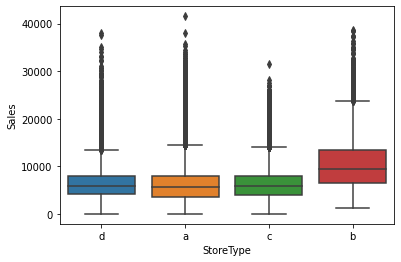

In [ ]:
sns.boxplot(data = new_train.sort_values("Sales",ascending=True),x="StoreType",y="Sales")#,hue="Assortment")

In [ ]:
new_train.groupby("StoreType")["Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,386873.0,5808.558785,4024.429070,0.0,3548.0,5691.0,7953.00,41551.0
b,11177.0,10496.344815,5143.850622,1252.0,6591.0,9414.0,13417.00,38722.0
c,96322.0,5815.651398,3761.574751,0.0,3879.0,5876.0,7977.00,31415.0
d,217674.0,5772.510957,3564.810986,0.0,4087.0,5964.0,7867.75,38037.0


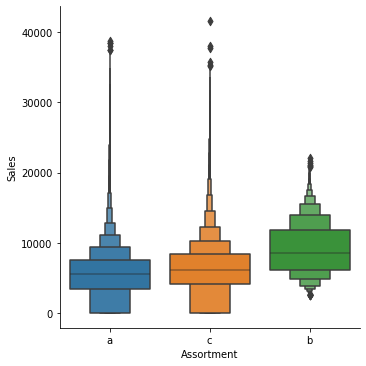

In [ ]:
sns.catplot(data = new_train.sort_values("Sales",ascending=True),x="Assortment",y="Sales",kind = "boxen")

In [ ]:
new_train.groupby("Assortment").Sales.describe()

,count,mean,std,min,25%,50%,75%,max
Assortment,,,,,,,,
a,375158.0,5534.041204,3733.127233,0.0,3510.0,5519.0,7590.0,38722.0
b,5830.0,9120.730017,3804.335638,2531.0,6080.5,8558.0,11830.5,22137.0
c,331058.0,6197.944913,4069.058394,0.0,4148.0,6183.0,8370.0,41551.0


In [ ]:
for i in new_train.StoreType.unique():
  print("Store type -> {}".format(i),pd.DataFrame(new_train[new_train.StoreType==i].Assortment).value_counts())

Store type -> c Assortment
a             49799
c             46523
dtype: int64
Store type -> a Assortment
a             242122
c             144751
dtype: int64
Store type -> d Assortment
c             139116
a              78558
dtype: int64
Store type -> b Assortment
b             5830
a             4679
c              668
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


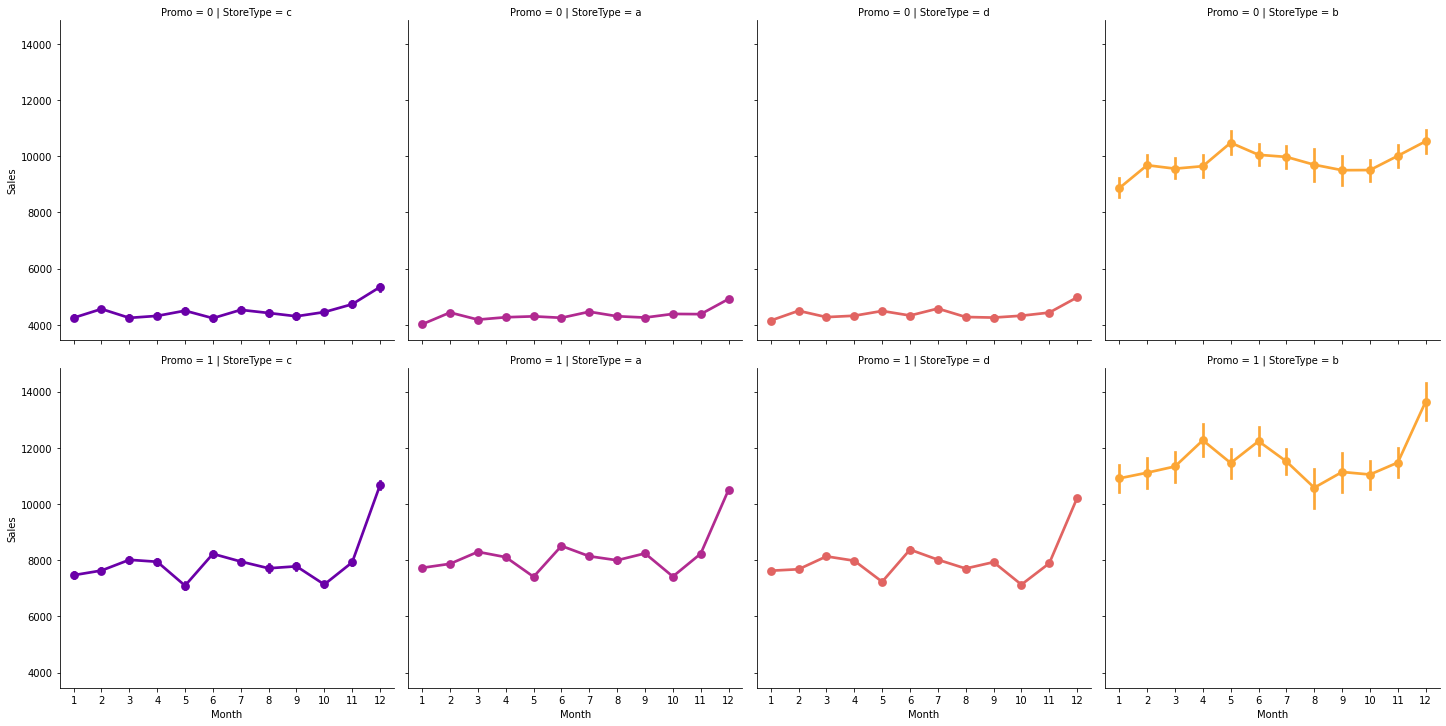

In [ ]:
sns.factorplot(data = new_train, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = 'c') 

#**Feature Engineering**

In [ ]:
## handling Categorical features
new_train = pd.get_dummies(new_train,columns=["Assortment","StoreType","StateHoliday"],drop_first=True)

In [ ]:
new_test = pd.get_dummies(new_test,columns=["Assortment","StoreType","StateHoliday"],drop_first=True)

In [ ]:
new_train.head()

,Store,DayOfWeek,Date,Sales,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Assortment_b,Assortment_c,StoreType_b,StoreType_c,StoreType_d,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,1,1,1,1270.0,9.0,2008.0,0,0,0,0,1,0,0,0,0
1,1,4,2015-07-30,5020,1,1,1,1270.0,9.0,2008.0,0,0,0,0,1,0,0,0,0
2,1,3,2015-07-29,4782,1,1,1,1270.0,9.0,2008.0,0,0,0,0,1,0,0,0,0
3,1,2,2015-07-28,5011,1,1,1,1270.0,9.0,2008.0,0,0,0,0,1,0,0,0,0
4,1,1,2015-07-27,6102,1,1,1,1270.0,9.0,2008.0,0,0,0,0,1,0,0,0,0


In [ ]:
## Handling Date-time feature

def date_time(data):
  
  data["Date"] = pd.to_datetime(data['Date'], errors='coerce')
  data["Year"] = data.Date.dt.year
  data["Month"] = data.Date.dt.month
  data["Day"] = data.Date.dt.day
  data['DayOfWeek'] = data.Date.dt.dayofweek
  data['WeekOfYear'] = data.Date.dt.weekofyear
  
  

In [ ]:
date_time(new_train)
date_time(new_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
## We have dropped Store feature as same info is carried by the StoreType feature

new_train.drop("Date",axis=1,inplace=True)
new_test.drop("Date",axis=1,inplace=True)
#new_train.drop("Store",axis=1,inplace=True)
#new_test.drop("Store",axis=1,inplace=True)

In [ ]:
X = new_train.drop("Sales",axis=1)
y = new_train.Sales

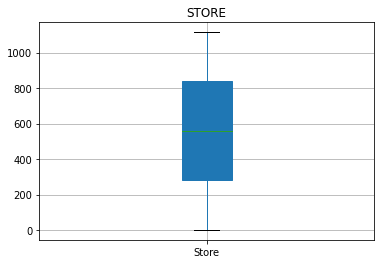

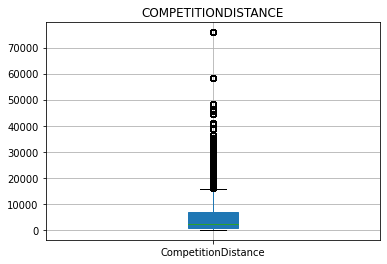

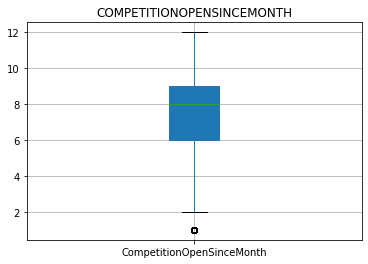

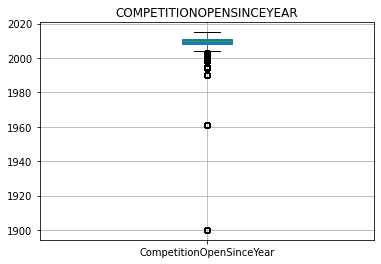

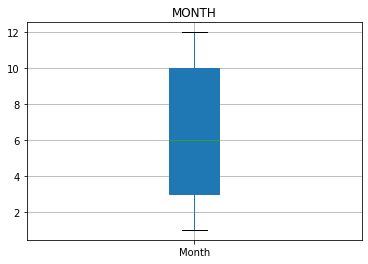

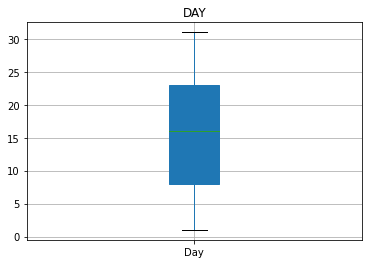

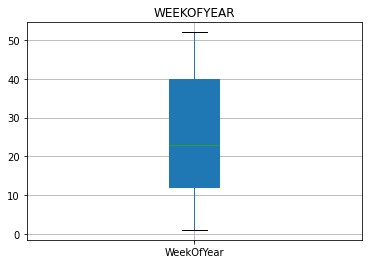

**************************************************************************************************** 

**************************************************************************************************** 

**************************************************************************************************** 

**************************************************************************************************** 

**************************************************************************************************** 



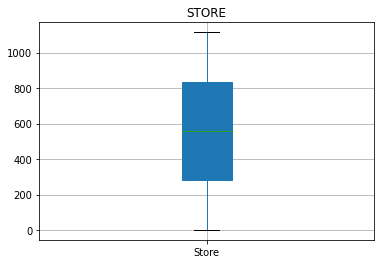

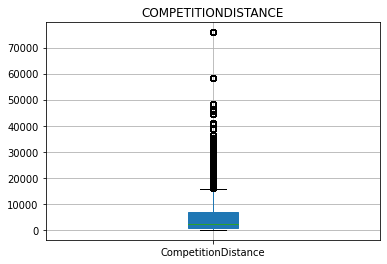

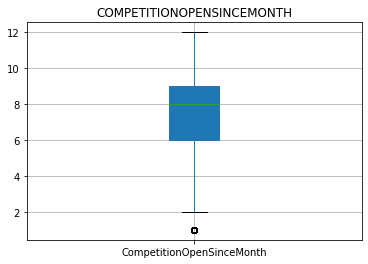

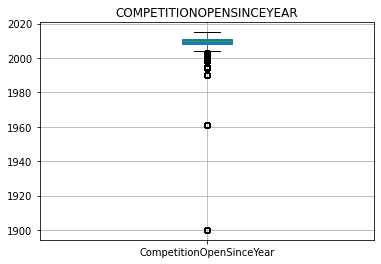

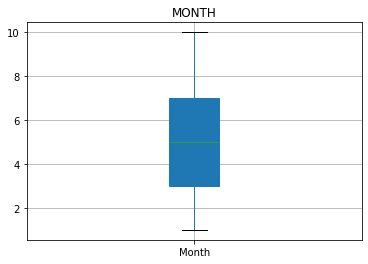

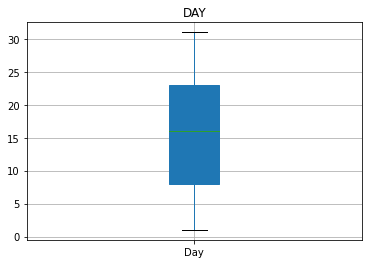

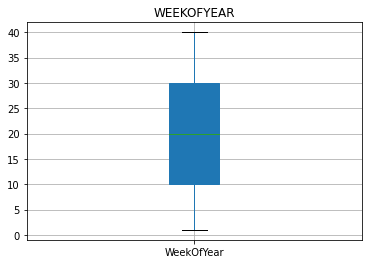

In [ ]:
## We see that there are outliers in our continuous data

def outlier_check(data):
  continuous = [feature for feature in data.columns if data[feature].nunique()>7]
  for feature in continuous:
    plt.title(feature.upper())
    data[[feature]].boxplot(patch_artist=True)
    plt.show()


outlier_check(X)
for i in range(5):
  print("*"*100,'\n')
outlier_check(new_test)

In [ ]:
## We try to calculate the Outlier values along with upper_bound and lower_bound

def outlier_Calculation(data):
  IQR = data.quantile(0.75)-data.quantile(0.25)
  print("The interquantile range is: \n-------")
  print(IQR)
  lower_limit = data.quantile(0.25)-(IQR*1.5)
  upper_limit = data.quantile(0.75)+(IQR*1.5)
  print("The lower limit is: \n----------")
  print(lower_limit)
  print("The upper limit is: \n-------")
  print(upper_limit)


outlier_Calculation(X[["CompetitionOpenSinceYear","CompetitionDistance"]])
for _ in range(5):
  print("%"*100)
outlier_Calculation(new_test[["CompetitionOpenSinceYear","CompetitionDistance"]])


The interquantile range is: 
-------
CompetitionOpenSinceYear       3.0
CompetitionDistance         6170.0
dtype: float64
The lower limit is: 
----------
CompetitionOpenSinceYear    2003.5
CompetitionDistance        -8545.0
dtype: float64
The upper limit is: 
-------
CompetitionOpenSinceYear     2015.5
CompetitionDistance         16135.0
dtype: float64
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The interquantile range is: 
-------
CompetitionOpenSinceYear       3.0
CompetitionDistance         6160.0
dtype: float64
The lower limit is

In [ ]:
## Outlier Fixing

X.loc[X.CompetitionDistance>16135.0,"CompetitionDistance"]=16135.0
X.loc[X.CompetitionOpenSinceYear<2003,"CompetitionOpenSinceYear"]=2013

new_test.loc[new_test.CompetitionDistance>16120.0,"CompetitionDistance"]=16120.0
new_test.loc[new_test.CompetitionOpenSinceYear<2003,"CompetitionOpenSinceYear"]=2013




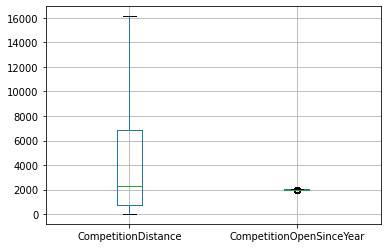

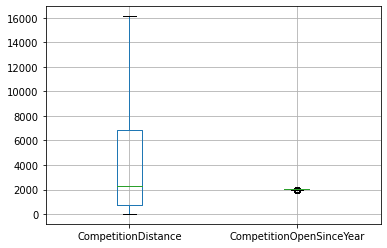

In [ ]:
X[["CompetitionDistance","CompetitionOpenSinceYear"]].boxplot()
plt.show()
new_test[["CompetitionDistance","CompetitionOpenSinceYear"]].boxplot()
plt.show()

In [ ]:
## We try to scale the data as there are diiferent range of values
def Standard_Scaling(data):
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  feature_scale = [feature for feature in data.columns]
  data = pd.DataFrame(scaler.fit_transform(data[feature_scale]),columns = feature_scale)
  return data

In [ ]:
X = Standard_Scaling(X)
new_test = Standard_Scaling(new_test)
display(X.head(3),new_test.head(3))

,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Assortment_b,Assortment_c,StoreType_b,StoreType_c,StoreType_d,StateHoliday_a,StateHoliday_b,StateHoliday_c,Year,Month,Day,WeekOfYear
0,-1.73133,0.501041,0.454854,1.275707,2.192785,-0.652059,0.571601,-0.755938,-0.991275,-0.090858,-0.932173,-0.126283,2.52831,-0.663554,-0.144411,-0.079392,-0.076101,1.223702,0.227032,1.738653,0.385366
1,-1.73133,0.000107,0.454854,1.275707,2.192785,-0.652059,0.571601,-0.755938,-0.991275,-0.090858,-0.932173,-0.126283,2.52831,-0.663554,-0.144411,-0.079392,-0.076101,1.223702,0.227032,1.624808,0.385366
2,-1.73133,-0.500827,0.454854,1.275707,2.192785,-0.652059,0.571601,-0.755938,-0.991275,-0.090858,-0.932173,-0.126283,2.52831,-0.663554,-0.144411,-0.079392,-0.076101,1.223702,0.227032,1.510964,0.385366


,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Assortment_b,Assortment_c,StoreType_b,StoreType_c,StoreType_d,StateHoliday_a,StateHoliday_b,Year,Month,Day,WeekOfYear
0,0.648169,-1.497488,-2.238881,-0.788954,2.039824,1.628319,0.19771,-0.028105,-1.024507,-0.090223,1.083208,-0.124433,-0.391284,-0.673555,-0.138137,11.655230,0.0,-0.398454,-1.664883,-0.548544
1,0.648169,-0.497485,0.446652,-0.788954,-0.490238,1.628319,0.19771,-0.028105,-1.024507,-0.090223,1.083208,-0.124433,-0.391284,-0.673555,-0.138137,-0.085798,0.0,1.147618,-0.982758,1.045813
2,0.648169,1.502521,-2.238881,-0.788954,-0.490238,1.628319,0.19771,-0.028105,-1.024507,-0.090223,1.083208,-0.124433,-0.391284,-0.673555,-0.138137,-0.085798,0.0,-0.398454,-0.982758,-0.548544


In [ ]:
## As this Stateholiday is not present in test dataset we drop it 

X.drop("StateHoliday_c",axis=1,inplace = True) 

# **Model Creation**

In [ ]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(random_state=42)
reg_rf.fit(X_train, y_train)
pred = reg_rf.predict(X_test)


In [ ]:
print('Root mean squared error for RandomForestRegression is {} and the R2 value of the model is {}'.format(np.sqrt(mean_squared_error(y_test,pred)),r2_score(pred,y_test)))

Root mean squared error for RandomForestRegression is 906.4294884446854 and the R2 value of the model is 0.9430461171070124


In [ ]:
models = [["RandomForestRegressor:",RandomForestRegressor()],
          ["XgBoost Regressor:",XGBRegressor()],
          ["Extra Tree Regressor:", ExtraTreeRegressor()],
         ]

RandomForestRegressor:  : The Root mean Square root value is 907.9599737711794 and R2 value is0.9428505545789657


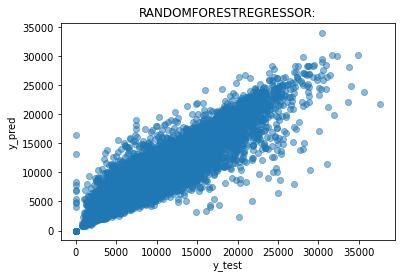

[13:46:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XgBoost Regressor:  : The Root mean Square root value is 2264.2149358838774 and R2 value is0.44140934678078647


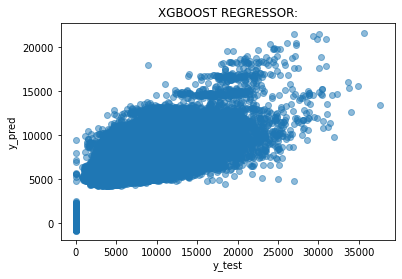

Extra Tree Regressor:  : The Root mean Square root value is 1501.054220481373 and R2 value is0.8539903007134952


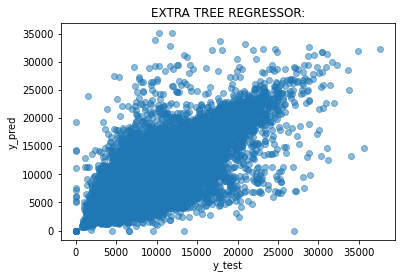

In [ ]:
for model_name,model_type in models:
  model = model_type
  model.fit(X_train,y_train)
  pred=model.predict(X_test)

  print(model_name,np.sqrt(mean_squared_error(pred,y_test)))
  plt.scatter(y_test, pred, alpha = 0.5)
  plt.title(model_name.upper())
  plt.xlabel("y_test")
  plt.ylabel("y_pred")
  plt.show()

Hyperparameter Tuning

In [ ]:
# Number of trees in random forest
n_estimators = [20,50,90,100,125,150,200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,5,9,15,25,35,40]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}



rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 25.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
reg_rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
reg_rf.fit(X_train, y_train)
pred = reg_rf.predict(X_test)


In [ ]:
print('Root mean squared error for RandomForestRegression is {} and the R2 value of the model is {}'.format(np.sqrt(mean_squared_error(y_test,pred)),r2_score(pred,y_test)))

Root mean squared error for RandomForestRegression is 1144.5253654116593 and the R2 value of the model is 0.9051050471652038


As the tuning didn't bring significant change hence we'd go with our earlier model

In [ ]:
prediction = reg_rf.predict(new_test)

In [ ]:
prediction = pd.DataFrame(prediction,columns=["Sales"])

In [ ]:
prediction.index.names=["Index"]
prediction.head()

,Sales
Index,
0,0.000000
1,5631.425833
2,0.000000
3,4276.873417
4,0.000000


In [ ]:
prediction.to_csv("pred_file.csv")